In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('news.csv')

In [3]:
df.shape

(6335, 4)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.drop_duplicates(inplace= True)
df.shape

(6335, 4)

In [6]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
y=df.label
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
x=df.text
x.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [9]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [10]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [11]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [12]:
print("tfidf_train=> n_samples: %d, n_features: %d" %tfidf_train.shape)
print("tfidf_test=> n_samples: %d, n_features: %d" %tfidf_test.shape)

tfidf_train=> n_samples: 5068, n_features: 61651
tfidf_test=> n_samples: 1267, n_features: 61651


In [13]:
naive_bayes_classifier=MultinomialNB()
naive_bayes_classifier.fit(tfidf_train, y_train)

MultinomialNB()

In [14]:
y_pred=naive_bayes_classifier.predict(tfidf_test)

In [15]:
score=metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
print(metrics.classification_report(y_test, y_pred, target_names=["Positive", "Negative"]))

Accuracy: 84.06%
              precision    recall  f1-score   support

    Positive       0.97      0.71      0.82       638
    Negative       0.77      0.98      0.86       629

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.84      0.84      1267



In [16]:
print("Confusion Matrix:")
conf_matrix=metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[450 188]
 [ 14 615]]


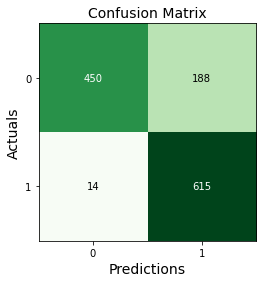

In [17]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
 
fig, ax = plot_confusion_matrix(conf_matrix, figsize=(4, 4), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()